<a href="https://colab.research.google.com/github/Diogo364/StepsIntoML/blob/master/GaussianRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo Concessão de Créditos com Python com Regressão Gaussiana

In [0]:
import pandas as pd
import numpy as np

# Importando o CSV para ser trabalhado:

In [0]:
base = pd.read_csv('creditos.csv')

In [0]:
base.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


Uma forma elegante de se avaliar os dados é utilizando o método `.describe()`


In [0]:
base.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [0]:
base.default.value_counts()

0    1717
1     283
Name: default, dtype: int64

Repare que temos alguns valores negativos para a idade. Isso deve ter ocorrido por conta de erros de digitação.

Uma forma de lidar com esse problema é substituir esses valores pela média.

In [0]:
mediaIdade = base.loc[base.age > 0, 'age'].mean()

In [0]:
base.loc[base.age < 0, 'age'] = mediaIdade

## Machine Learning
---
Gostaríamos de conseguir realizar a predição se um cliente conseguiria um empréstimo, para tal utilizaremos os campos seguintes como preditores:

In [0]:
# Preditores
att_peditores = ['income', 'age', 'loan']
# Conseguiu o empréstimo?
att_class = ['default']

Separando o DataSet em preditores e classes

In [0]:
preditores = base[att_peditores].copy()
classe = base[att_class].copy()

### Tratando Missing Values
---
Missing values - `NaN` - são extremamente prejudiciais no processo de treinamento de modelos de Machine Learning, para isso temos que decidir o que fazer com esses valores.

In [0]:
# Número de `NaN` por colunas
preditores.isna().sum()

income    0
age       0
loan      0
dtype: int64

## Usando SimpleImputer
---
É uma classe do Scikit learn que auxilia nesse processo

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
imputer = SimpleImputer()

In [0]:
imputer.fit(preditores)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [0]:
previsores = imputer.transform(preditores)

In [0]:
preditores.iloc[:] = previsores
preditores.head()

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


### Normalização e Padronização dos Dados
---
Processo importante para que o nosso modelo consiga trabalhar com variáveis em mesma escala.

`(valor - media)/desvioPadrao`

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
standardPreditores = scaler.fit_transform(preditores)

In [0]:
preditores[:] = standardPreditores
preditores.head()

,income,age,loan
0,1.453934,1.365380,1.202819
1,-0.762176,0.542659,0.696427
2,0.836821,1.674171,1.174711
3,-0.183070,0.364136,0.544980
4,1.509563,-1.686475,1.420765


### Split na Base em Treino x Teste

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
previsores_treino, previsores_teste, classe_treino, classe_teste = \
train_test_split(preditores, classe, test_size=0.25)

### Treino do Modelo

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
gaussian = GaussianNB()

In [0]:
gaussian.fit(previsores_treino, classe_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
previsoes = gaussian.predict(previsores_teste)

### Avaliação do Modelo

In [0]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [0]:
acuracia = accuracy_score(classe_teste, previsoes)

In [0]:
acuracia

0.924

In [0]:
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
matriz

array([[417,  10],
       [ 28,  45]])

#### Visualizando Matriz de Confusão de uma forma mais bonita

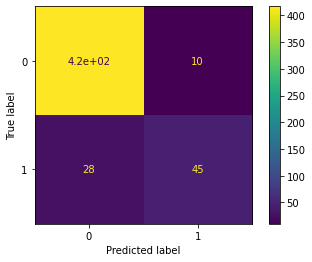

In [0]:
import seaborn as sns
plot_confusion_matrix(gaussian, previsores_teste, classe_teste)